<h1>Proyecto final Métodos Computacionales</h1>


### **Presentado por:**

- Fernanda Mora Rey 
- Sofía Casallas Beltrán


### **Problema:**
Análisis probabilístico básico del átomo de Hidrógeno.

La función de onda del hidrógeno describe el estado cuántico de un átomo de hidrógeno. En el sistema de coordenadas esféricas, la función de onda se puede expresar en términos de tres variables: el radio $(r)$, el ángulo polar $(\theta)$ y el ángulo azimutal $(\phi)$.

La función de onda del hidrógeno se puede escribir en forma de productos de tres funciones: la función radial $R(r)$, la función polar $\theta$, y la función azimutal $\phi$. Estas funciones se multiplican entre sí para formar la función de onda total.

La función radial $R(r)$ está asociada con el movimiento del electrón en la dirección radial desde el núcleo del átomo de hidrógeno. Se expresa en términos de los números cuánticos principales $n$ y secundarios $l$. La función polar $P(\theta)$ describe la distribución angular de la función de onda y está relacionada con el número cuántico secundario $l$. Por último, la función azimutal $\phi$ está asociada con la orientación angular del electrón y depende del número cuántico magnético $m$. La función polar y azimutal se expresan de manera unificada con el armónico esférico $Y(\theta,\phi)$. De esta manera la función de onda se escribe de la forma:

\begin{equation}
Ψ(r,\,\phi)=R(r)Y(\theta,\phi)
\end{equation}

Donde la función radial es:

\begin{equation}
R_{nl}(r)=-\sqrt{\left(\frac{2z}{na_{0}}\right)^{3}*\frac{(n-l-1)!}{(2n(n+l)!)^{3}}}e^{-\frac{\rho}{2}}{\rho}^{l} L_{n+l}^{2l+1}(ρ)
\end{equation}

con $a_0=0,529\times10^{-8} cm$  el radio de Bohr.

Recordando que los polinomios asociados de Laguerre son:
\begin{equation}
L_{p}^{q}(ρ)=\frac{d^{q}}{dρ^{q}}L_{p}(\rho)
\end{equation}
con $p=n+l$ y $q=2l+1$

El cual asocia el polinomio de Laguerre:
\begin{equation}
L_{p}(ρ)=e^{\rho}\frac{d^{p}}{dρ^{p}}(\rho^{p}e^{-\rho})
\end{equation}

donde $\rho=\frac{2zr}{na_{0}}$ y en el caso del átomo de hidrógeno con $z=1$.

Por otro lado los armónicos esféricos, los cuales tienen la dependencia angular del problema, se expresan como:

\begin{equation}
Y_{l}^{m}(θ,ϕ)=(-1)^{m}\sqrt{\left(\frac{(2l+1)}{4π}\right)\frac{(l-|m|)!}{(l+|m|)!)}}P_{l}^{m}(cosθ)e^{imϕ}
\end{equation}

Estos dependen de las funciones asociadas de Legendre, y este de los polinomios asociados de Legendre, los cuales son respectivamente:

\begin{equation}
P_{l}^{m}(x)={(-1)}^{m}(1-x^{2})^{\frac{m}{2}}{\frac{d^{m}}{dx^{m}}}P_{l}(x)
\end{equation}

\begin{equation}
P_{l}(x)=\frac{1}{2^{l}l!}{\frac{d^{l}}{dx^{l}}}((1-x^{2})^{l}
\end{equation}


In [33]:
import sympy as sp
import numpy as np
from scipy.special import sph_harm, genlaguerre, factorial
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from scipy import integrate

In [34]:
# Parámetros
n = int(input("Ingrese el número cuántico principal para el nivel de energía (n): "))
l = int(input("Ingrese el número cuántico asimutal (l): "))
m = int(input("Ingrese el número cuántico magnético (m): "))


Ingrese el número cuántico principal para el nivel de energía (n): 4
Ingrese el número cuántico asimutal (l): 2
Ingrese el número cuántico magnético (m): 0


In [35]:
if l>=n:
  print('ERROR: los valores permitidos para l son hasta n-1')

if l<m:
  print('ERROR: l debe ser mayor o igual a m')
p=n+l
q=2*l+1

a, r, rho, x, ei= sp.Symbol('a'), sp.Symbol('r'), sp.Symbol('rho'), sp.Symbol('x'), sp.Symbol('e^{iϕ}') # Simbolo radio de Bohr
a_0=0.529

**Símbolos:**
- r es el símbolo del radio
- rho es el símbolo de $\rho$.
- x es el símbolo que se usará para los asociados de Legendre.
- ei es el símbolo que se usará para los armónicos esféricos.

## Ecuación radial:

In [36]:
#Polinomio de Laguerre
y1=rho**p * sp.exp(-rho)
derivada_pl=sp.diff(y1,rho,p)

L_p=sp.exp(rho)*derivada_pl
L_p=L_p.simplify()

#Polinomio asociado
derivada_pal=sp.diff(L_p,rho,q)
L_pq=derivada_pal

R_nl_1= -1*sp.sqrt((2/(n*a))**3*sp.factorial(n-l-1)/(2*n*sp.factorial(n+l)))*(rho**l)
R_nl_2= sp.exp(-1*rho/2)
R_nl= R_nl_1*R_nl_2*L_pq
R_nl.simplify()

#Convertir la ecuación radial simbólica a función:
R_subs = R_nl.subs({rho:2*r/(n*a_0)})
R_subs = R_subs.subs({a: a_0})
R_fun= sp.lambdify(r,R_subs)

#Polinomios asociados de Legendre para los armónicos:
P1=(-1)**m/(2**l*sp.factorial(l))*(1-x**2)**(m/2)
P1=P1.simplify()

fun=(x**2-1)**l
P2=fun.diff(x,l+m)

P_lm=P1*P2


## Ecuación de los armónicos esféricos:

In [37]:
if m==0:
  ei=1
elif m!=0:
  ei=ei

Y=sp.sqrt((2*l+1)/(4*sp.pi)*sp.factorial(l-np.abs(m))/sp.factorial(l+np.abs(m)))*P_lm*(ei)**(m)

#Covertir de ecuación simbólica a función:
theta = sp.symbols('theta')
Y_subs=Y.subs(x, sp.cos(theta))
Y_subs.simplify()

#@title La función de onda es:
W=R_subs*Y_subs
W.simplify()

W*W/ei**(m+m)

Walados=W*W/ei**(m+m)
Walados.simplify()

#De símbolo a función
W_fun = sp.lambdify((r,theta), Walados) 

## Gráfica polar de la función de onda:

In [38]:
# Definir la función de onda en coordenadas esféricas
def onda(n, l, m, r, theta, phi):
  # Funciones radiales
  a = 0.529  # Constante de Bohr
  rho = 2 * r / (n * a)
  L = n - l - 1
  lag = genlaguerre(L, 2 * l + 1)(rho)
  R = np.sqrt((2 / (n * a)) ** 3 * np.math.factorial(n - l - 1) / (2 * n * np.math.factorial(n + l))) * np.exp(-rho / 2) * rho ** l * lag

  # Armónicos
  Y = sph_harm(m, l, theta, phi)
  return R * Y.real

Ahora calcularemos la probabilidad radial en el átomo de hidrógeno y graficamos la función

In [39]:
r=np.linspace(0,50,100)
theta=np.linspace(0,np.pi,100)
phi = np.linspace(0, 2*np.pi, 100)

# Crear una malla de valores de theta y phi
theta, phi = np.meshgrid(np.linspace(0, np.pi, 100), np.linspace(0, 2*np.pi, 100))

# Calcular los valores de la función de onda
F_lm = onda(n, l, m, r, theta, phi)

# Grafica polar de los orbitales
theta = np.linspace(0, 2*np.pi, 100)
r = np.linspace(0, 10, 100)
R, Theta = np.meshgrid(r, theta)

valor_esperado=round(a_0/2*(3*n**2-l*(l+1)),3)
valor_esperado_=round(valor_esperado,5)
texto = f'E[r]= {valor_esperado_}'
texto2='Orbital (n={}, l={}, m={})'.format(n, l, m)

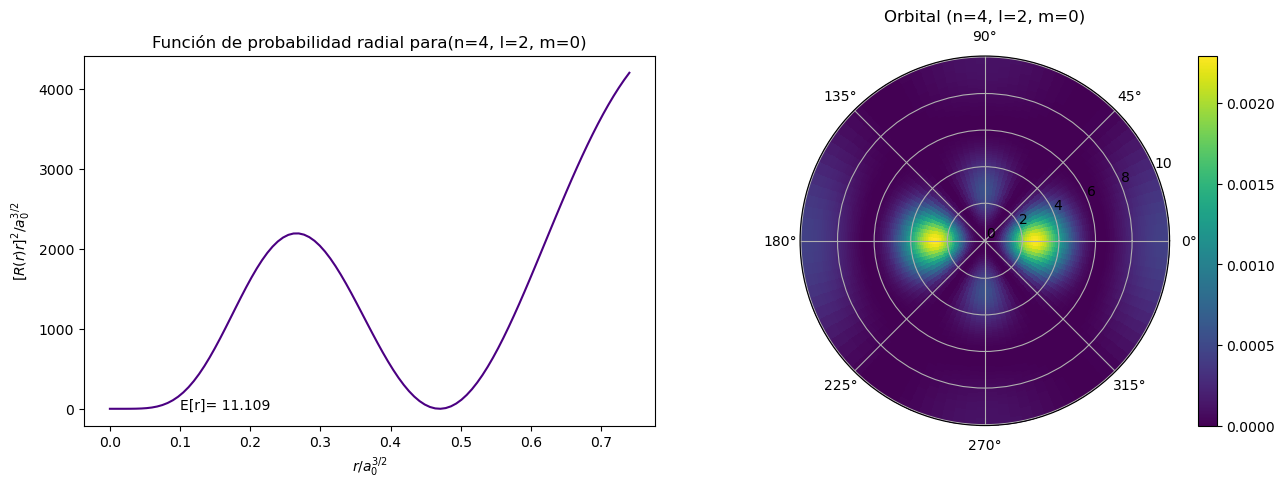

In [40]:
#Calcular la función de probabilidad radial para los valores de n, m y l
plt.subplot(121)
plt.plot(r*a_0**3/2, R_fun(r)**2*r**2*a_0**3/2, color='indigo')
plt.title('Función de probabilidad radial para(n={}, l={}, m={})'.format(n, l, m))
plt.xlabel('$r/a_0^{3/2} $')
plt.ylabel('$[R(r)r]^2/a_0^{3/2} $')
plt.text(0.1, 0.1, texto, fontsize=10)

# Calcular la función de onda del orbital para los valores de n, m y l
psi = onda(n, l, m, r, theta, phi)
plt.subplot(122, projection='polar')
plt.pcolormesh(Theta, R, np.abs(psi) ** 2)
plt.colorbar()
plt.title('Orbital (n={}, l={}, m={})'.format(n, l, m))
plt.subplots_adjust(wspace=0.1, right=2) # Ajustar el espacio horizontal entre los subplots

plt.show()

## Conclusión: 

A partir de las gráficas encontradas podemos comparar con los resultados teóricos que se encuentran los valores esperados tanto en la función de onda como la forma de la gráfica de función de probabilidad radial del átomo de hidrógeno.

### Función de onda para el átomo con niveles (n, l, m):


![Atomo](https://upload.wikimedia.org/wikipedia/commons/e/e7/Hydrogen_Density_Plots.png)

### Función de probabilidad radial:

En esta gráfica se ven solo tres resultados con m=0 y ciertos valores de n y l:

![Grafica](https://4.bp.blogspot.com/_js6wgtUcfdQ/TCo7TH278NI/AAAAAAAAMAM/DKPBk40AF-I/s280/funciones_de_onda_radiales_del_hidrogeno_1.png)

## Bibliografía

http://la-mecanica-cuantica.blogspot.com/2009/08/momento-angular-orbital-funciones-de_11.html

http://la-mecanica-cuantica.blogspot.com/2009/08/la-funcion-de-onda-radial.html

https://es.wikipedia.org/wiki/Polinomios_asociados_de_Legendre

https://es.wikipedia.org/wiki/Armónicos_esféricos

https://openstax.org/books/física-universitaria-volumen-3/pages/8-1-el-atomo-de-hidrogeno

https://www.ugr.es/~jruizs/Ficheros/EnlaceQ/Tema3.pdf

http://www.qfa.uam.es/qf3/presentaciones/leccion13.pdf